In [1]:
#CNN for Gender Classification

In [2]:
pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashwingupta3012/male-and-female-faces-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.63G/1.63G [04:01<00:00, 7.28MB/s]

Extracting files...


Path to dataset files: /home/y4ada2/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1


In [10]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [11]:
dataset_path = "/home/y4ada2/LAB/Male and Female face dataset" 




img_height, img_width = 256, 256
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, 
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # binary classification (male/female)
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 4335 images belonging to 2 classes.
Found 1083 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])


In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
epochs = 7
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


Epoch 1/7
136/136 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.6245 - loss: 0.8266 - val_accuracy: 0.7941 - val_loss: 0.4702
Epoch 2/7
136/136 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.7835 - loss: 0.4526 - val_accuracy: 0.8347 - val_loss: 0.3938
Epoch 3/7
136/136 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8645 - loss: 0.2952 - val_accuracy: 0.8984 - val_loss: 0.2406
Epoch 4/7
136/136 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9293 - loss: 0.1801 - val_accuracy: 0.9464 - val_loss: 0.1521
Epoch 5/7
136/136 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9550 - loss: 0.1287 - val_accuracy: 0.9511 - val_loss: 0.1459
Epoch 6/7
136/136 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9637 - loss: 0.0983 - val_accuracy: 0.9658 - val_loss: 0.1069
Epoch 7/7
136/136 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9840 - loss: 0.0511 - val_accuracy: 0.9575 - val_loss: 0.1538


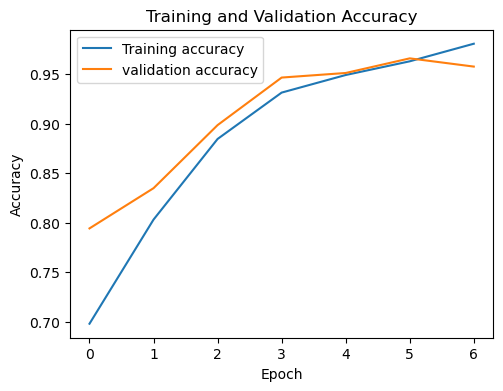

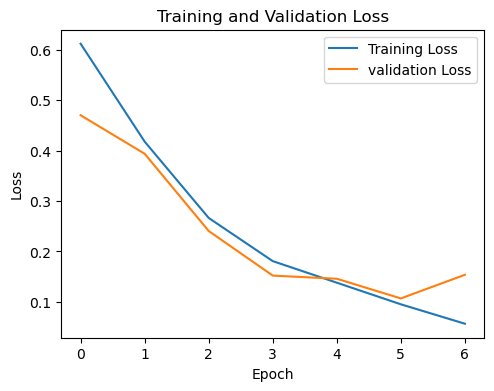

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


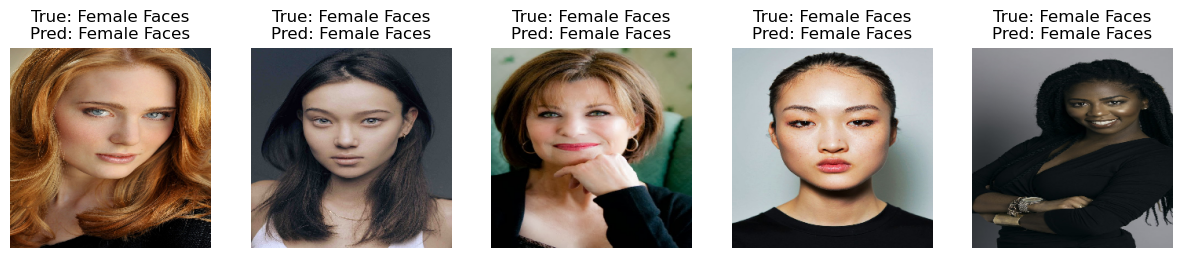

In [26]:
# Get a batch of images and labels from validation generator
images, labels = next(val_generator)  # batch size images

# Select first 5 samples
images_to_show = images[:5]
true_labels = labels[:5]

# Predict probabilities (output between 0 and 1)
pred_probs = model.predict(images_to_show)

# Convert probabilities to binary predictions (0 or 1)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

label_map = {v: k for k, v in train_generator.class_indices.items()}

plt.figure(figsize=(15, 7))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images_to_show[i])
    plt.axis('off')

    true_label_name = label_map[true_labels[i]]
    pred_label_name = label_map[pred_labels[i]]

    plt.title(f"True: {true_label_name}\nPred: {pred_label_name}")

plt.show()


Found 1083 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


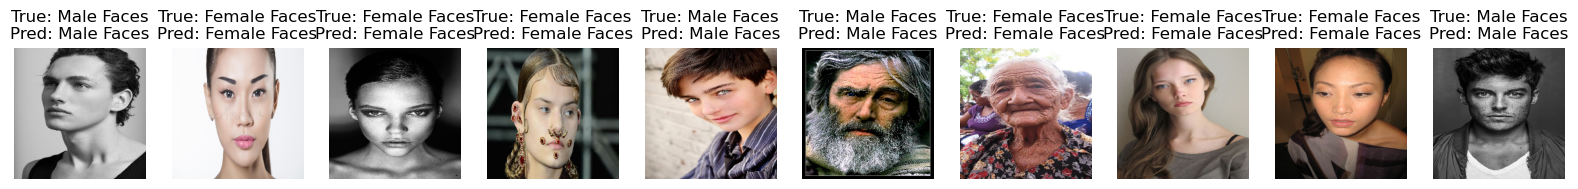

In [29]:
val_gen_single = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=1,  # one image per batch
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)

import random
import numpy as np
num_val_samples = val_gen_single.samples
random_indices = random.sample(range(num_val_samples), 10)

images = []
labels = []

for idx in random_indices:
    img, label = val_gen_single[idx]  # Now idx refers to batch index (one image)
    images.append(img[0])  # img is batch of 1 image
    labels.append(label[0])

images = np.array(images)
labels = np.array(labels)

pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    true_label_name = label_map[labels[i]]
    pred_label_name = label_map[pred_labels[i]]
    plt.title(f"True: {true_label_name}\nPred: {pred_label_name}")
plt.show()
